# Preprocessing: Experimental Place Cells

This notebook provides context to explain:
- the raw data provided in matlab's files
- the preprocessing of the experimental place cells, for one experiment, here to chosen to be 34.

At the end of this notebook, we compute a table recording the number of cells _for each experiment_.

## Set up

In [2]:
import os
import subprocess

gitroot_path = subprocess.check_output(
    ["git", "rev-parse", "--show-toplevel"], universal_newlines=True
)

os.chdir(os.path.join(gitroot_path[:-1], "neurometry"))
print("Working directory: ", os.getcwd())

import warnings

warnings.filterwarnings("ignore")

import sys

sys_dir = os.path.dirname(os.getcwd())
sys.path.append(sys_dir)
print("Directory added to path: ", sys_dir)

Working directory:  /Users/facosta/Desktop/code/neurometry/neurometry
Directory added to path:  /Users/facosta/Desktop/code/neurometry


## Load raw data and find number of cells recorded

In [3]:
import glob

import numpy as np
import pandas as pd

import neurometry.datasets.utils as utils

RAW_DIR = os.path.join(os.getcwd(), "data", "raw")
print(f"The raw data is located in the directory:\n{RAW_DIR}.")

expt34 = utils.loadmat(os.path.join(RAW_DIR, "expt34.mat"))

INFO: Using pytorch backend


The raw data is located in the directory:
/Users/facosta/Desktop/code/neurometry/neurometry/data/raw.


In [4]:
expt34["x"].keys()

dict_keys(['rat', 'day', 'epoch', 'type', 'finalGain', 'rosdata', 'clust', 'specGain'])

In [12]:
encangmod = expt34["x"]["rosdata"]["encAngle"] % (2 * np.pi)

In [4]:
expt34["x"]["rosdata"]["encAngle"].shape

(296299,)

In [26]:
enctimes = expt34["x"]["rosdata"]["encTimes"]

In [23]:
enctimes.shape

(296299,)

In [21]:
velocities = expt34["x"]["rosdata"]["vel"]

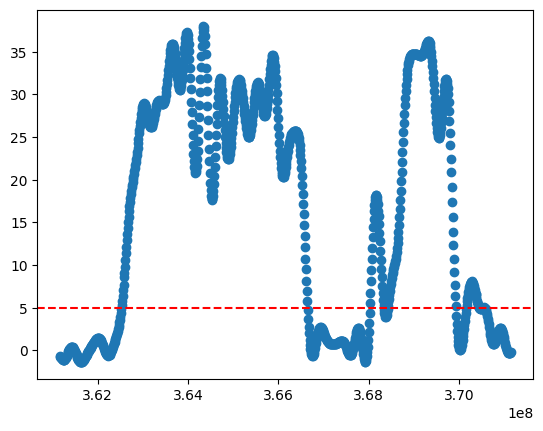

In [29]:
plt.scatter(enctimes[:1000], velocities[:1000])
plt.axhline(5, color="red", linestyle="--")

In [20]:
(enctimes[1] - enctimes[0]) * 1e-6

0.01053325

In [ ]:
all_firing_times = []
for neuron_firing_times in firing_times:
    all_firing_times.extend(neuron_firing_times)

# get rid of duplicates
all_firing_times = sorted(list(set(all_firing_times)))

n_times = len(all_firing_times)
print(f"Number of times after deleting duplicates: {n_times}.")

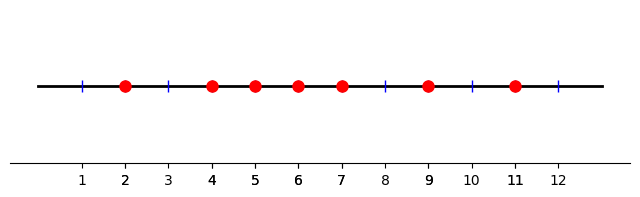

In [32]:
enctimes_short = enctimes[:1000]


import matplotlib.pyplot as plt
import numpy as np

# your 1-dimensional data
data1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
data2 = np.array([2, 4, 5, 6, 7, 9, 11])

fig, ax = plt.subplots(figsize=(8, 2))

# plot number line
ax.plot(
    [min(data1.min(), data2.min()) - 1, max(data1.max(), data2.max()) + 1],
    [0, 0],
    color="black",
    linewidth=2,
)

# plot data points on the number line
ax.plot(
    data1,
    np.zeros(data1.shape),
    linestyle="none",
    marker="|",
    color="blue",
    markersize=8,
)
ax.plot(
    data2,
    np.zeros(data2.shape),
    linestyle="none",
    marker="o",
    color="red",
    markersize=8,
)

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# set xticks
ax.set_xticks(np.concatenate([data1, data2]))

# show the plot
plt.show()

In [5]:
metadata = list(expt34["x"].keys())
print(f"You can find metadata about:\n {metadata}.")

You can find metadata about:
 ['rat', 'day', 'epoch', 'type', 'finalGain', 'rosdata', 'clust', 'specGain'].


In [6]:
n_cells = len(expt34["x"]["clust"])
print(f"There are {n_cells} cells/units/clusters recorded in this experiment.")

There are 40 cells/units/clusters recorded in this experiment.


## Extract angles information

In [7]:
rosdata = expt34["x"]["rosdata"]
enctimes = rosdata["encTimes"]

encangle = rosdata["encAngle"]
len(encangle) == len(enctimes)
print(len(encangle))

296299


In [9]:
diff_enctimes = enctimes[1:] - enctimes[:-1]

In [10]:
diff_enctimes

array([10533.25,  9547.75, 10203.  , ...,  9648.  , 10096.5 , 10260.5 ])

INFO: Animation.save using <class 'matplotlib.animation.HTMLWriter'>


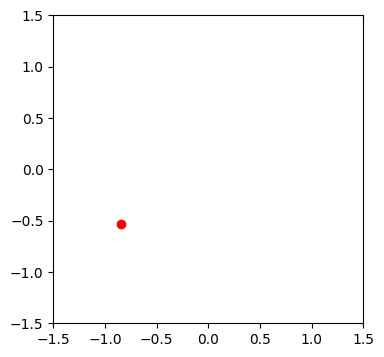

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

angles = encangle[:100]
timestamps = enctimes[:100]

# Convert angles to x, y coordinates
x = np.cos(angles)
y = np.sin(angles)

# Create figure and axes for the plot
fig, ax = plt.subplots(figsize=(4, 4))

# Creating a line which will be modified in the animation
(line,) = ax.plot(x[0], y[0], "ro")

# Setting the axes limits
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)


# Function to initialize the plot/figure
def init():
    line.set_data([], [])
    return (line,)


# Animation function which updates the line data
def animate(i):
    line.set_data(x[i], y[i])
    return (line,)


# Creating the animation
ani = FuncAnimation(
    fig,
    animate,
    frames=len(angles),
    init_func=init,
    blit=True,
    interval=1000,
    repeat=False,
)

# Display the animation in the Jupyter Notebook
from IPython.display import HTML

HTML(ani.to_jshtml())

## Extract cell firing

Find number of recorded cells:

In [12]:
n_cells = len(expt34["x"]["clust"])
print(f"There are {n_cells} cells/units/clusters recorded in this experiment.")

There are 40 cells/units/clusters recorded in this experiment.


We extract the firing times for every neuron, and store them in the list all_firing_times. Time is in units of microseconds

In [104]:
firing_times = []

for neuron in expt34["x"]["clust"]:
    firing_times.append(neuron["ts"])

In [105]:
firing_times[0]

array([3.68628787e+08, 3.68635519e+08, 3.68852857e+08, ...,
       3.07833970e+09, 3.07834393e+09, 3.28162030e+09])

We extract all the times at which at least 1 neuron fired

In [106]:
all_firing_times = []
for neuron_firing_times in firing_times:
    all_firing_times.extend(neuron_firing_times)

# get rid of duplicates
all_firing_times = sorted(list(set(all_firing_times)))

n_times = len(all_firing_times)
print(f"Number of times after deleting duplicates: {n_times}.")

Number of times after deleting duplicates: 41849.


Exploring histogram of time steps to choose a binsize.

In [107]:
all_firing_times = np.array(all_firing_times)
diff_times = all_firing_times[1:] - all_firing_times[:-1]

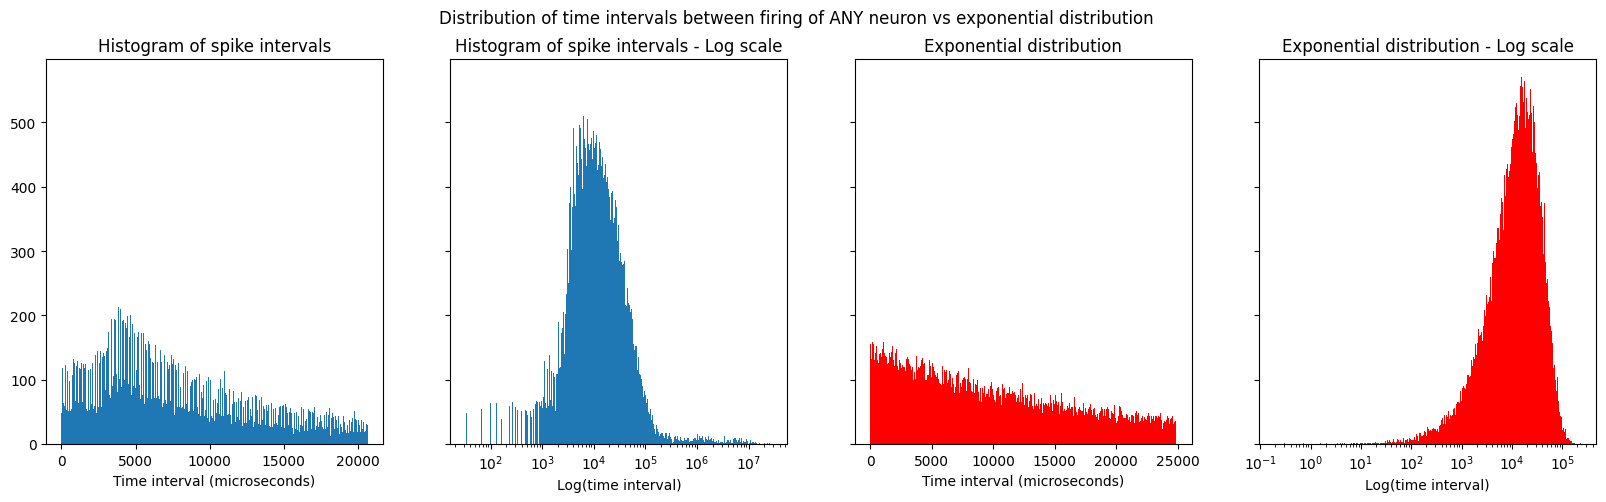

In [108]:
import matplotlib.pyplot as plt

# Create the figure and the subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

plt.suptitle(
    "Distribution of time intervals between firing of ANY neuron vs exponential distribution"
)

num_bins = 400

# plot histogram
axs[0].hist(diff_times, bins=num_bins, range=(0, 2 * np.median(diff_times)))
axs[0].set_xlabel("Time interval (microseconds)")
axs[0].set_title("Histogram of spike intervals")

log_bins = np.logspace(
    np.log10(np.min(diff_times[diff_times > 0])), np.log10(np.max(diff_times)), num_bins
)

# plot histogram on logarithmic scale
axs[1].hist(diff_times, bins=log_bins)
axs[1].set_xscale("log")
axs[1].set_title("Histogram of spike intervals - Log scale")
axs[1].set_xlabel("Log(time interval)")


exp_dist = np.random.exponential(scale=18000, size=len(diff_times))

# plot histogram
axs[2].hist(exp_dist, bins=num_bins, range=(0, 2 * np.median(exp_dist)), color="red")
axs[2].set_xlabel("Time interval (microseconds)")
axs[2].set_title("Exponential distribution")

log_bins = np.logspace(
    np.log10(np.min(exp_dist[exp_dist > 0])), np.log10(np.max(exp_dist)), num_bins
)

# plot histogram on logarithmic scale
axs[3].hist(exp_dist, bins=log_bins, color="red")
axs[3].set_xscale("log")
axs[3].set_title("Exponential distribution - Log scale")
axs[3].set_xlabel("Log(time interval)")
plt.show()

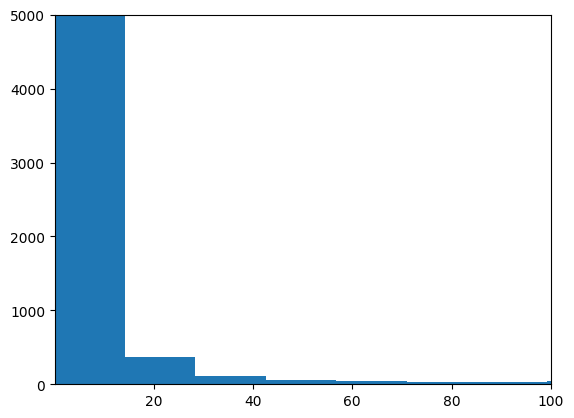

In [39]:
import matplotlib.pyplot as plt

plt.hist(diff_times * 1e-4, bins=200)
plt.xlim(0.1, 100)
plt.ylim(0, 5000)
plt.show()

In [109]:
delta_time = 1e6  # = 1 second
regular_times = np.arange(
    start=all_firing_times[0], stop=all_firing_times[-1], step=delta_time
)

In [110]:
diff_regular_times = regular_times[1:] - regular_times[:-1]
diff = regular_times[2] - regular_times[1]
assert sum(diff_regular_times != diff) == 0

In [111]:
print(len(all_firing_times))
print(len(regular_times))

41849
2954


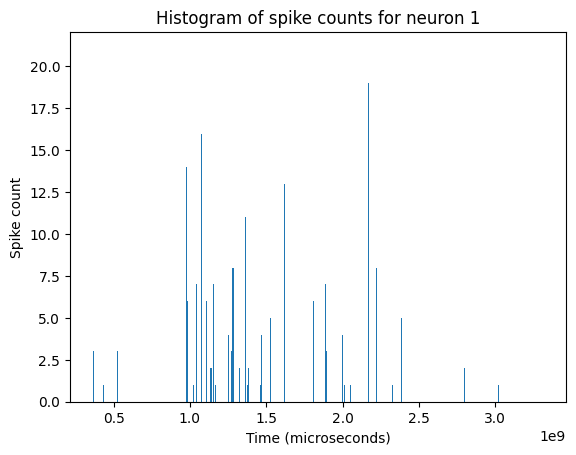

In [112]:
counts, bins, _ = plt.hist(firing_times[0], bins=regular_times)
plt.title("Histogram of spike counts for neuron 1")
plt.ylabel("Spike count")
plt.xlabel("Time (microseconds)");

## Bin the cell firing

Processing cell 0...
Processing cell 1...
Processing cell 2...
Processing cell 3...
Processing cell 4...
Processing cell 5...
Processing cell 6...
Processing cell 7...
Processing cell 8...
Processing cell 9...
Processing cell 10...
Processing cell 11...
Processing cell 12...
Processing cell 13...
Processing cell 14...
Processing cell 15...
Processing cell 16...
Processing cell 17...
Processing cell 18...
Processing cell 19...
Processing cell 20...
Processing cell 21...
Processing cell 22...
Processing cell 23...
Processing cell 24...
Processing cell 25...
Processing cell 26...
Processing cell 27...
Processing cell 28...
Processing cell 29...
Processing cell 30...
Processing cell 31...
Processing cell 32...
Processing cell 33...
Processing cell 34...
Processing cell 35...
Processing cell 36...
Processing cell 37...
Processing cell 38...
Processing cell 39...


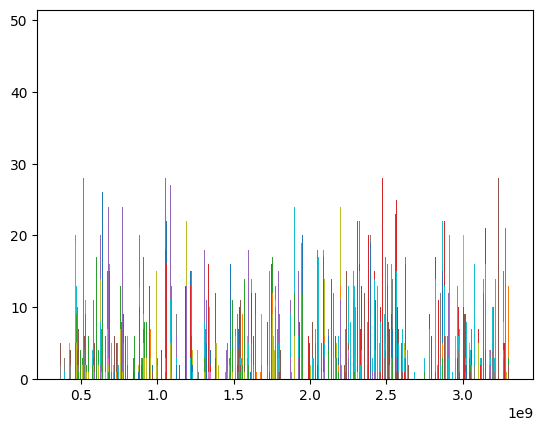

In [113]:
n_times = len(regular_times) - 1
place_cells = np.zeros((n_times, n_cells))

for neuron_index, neuron_firing_times in enumerate(firing_times):
    print(f"Processing cell {neuron_index}...")
    counts, bins, _ = plt.hist(neuron_firing_times, bins=regular_times)
    assert sum(bins != regular_times) == 0
    assert len(counts) == n_times
    place_cells[:, neuron_index] = counts

The array `place_cells` is of shapes `n_time_steps x n_neurons`.

In [60]:
place_cells.shape

(2953, 40)

In [58]:
np.max(place_cells)

49.0

In [59]:
np.min(place_cells)

0.0

We plot the firing of the `n_neurons` place cells as a function of the time step, where time step is on the horizontal axis.

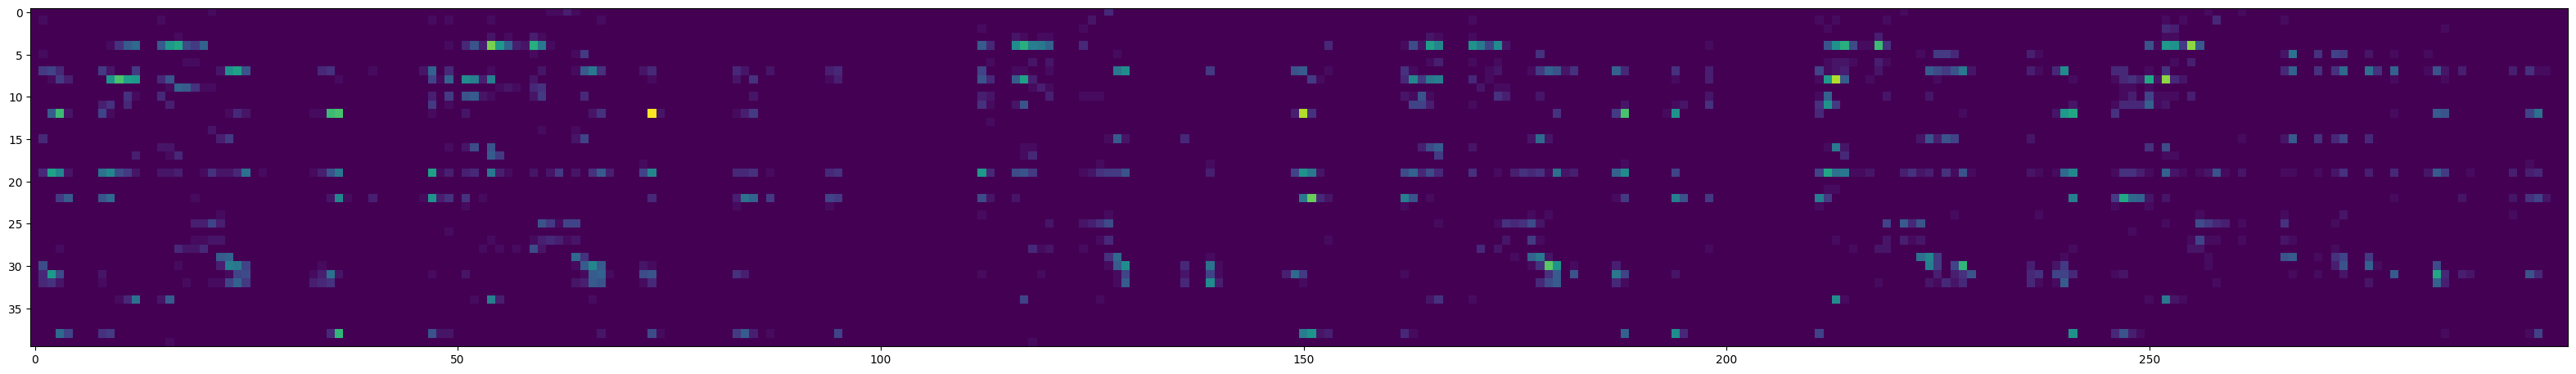

In [61]:
plt.figure(figsize=(40, 10))
plt.imshow(
    place_cells[100:400,].T,
    cmap="viridis",
);

## Bin the rat's position


In [102]:
enc_counts, enc_bins, _ = plt.hist(enctimes, bins=regular_times)
plt.close()

For every time bin, get the average angle occupied by rat

In [75]:
averaged_encangles = []
cum_count = 0
for count in enc_counts:
    averaged_encangles.append(np.mean(encangle[cum_count : cum_count + int(count)]))
    cum_count += int(count)
assert len(averaged_encangles) == len(regular_times) - 1

We observe that we have absolute angles, i.e. angles > 360 degrees where the animal keeps turning.

In [76]:
mod360_encangles = [a % 360 for a in averaged_encangles]

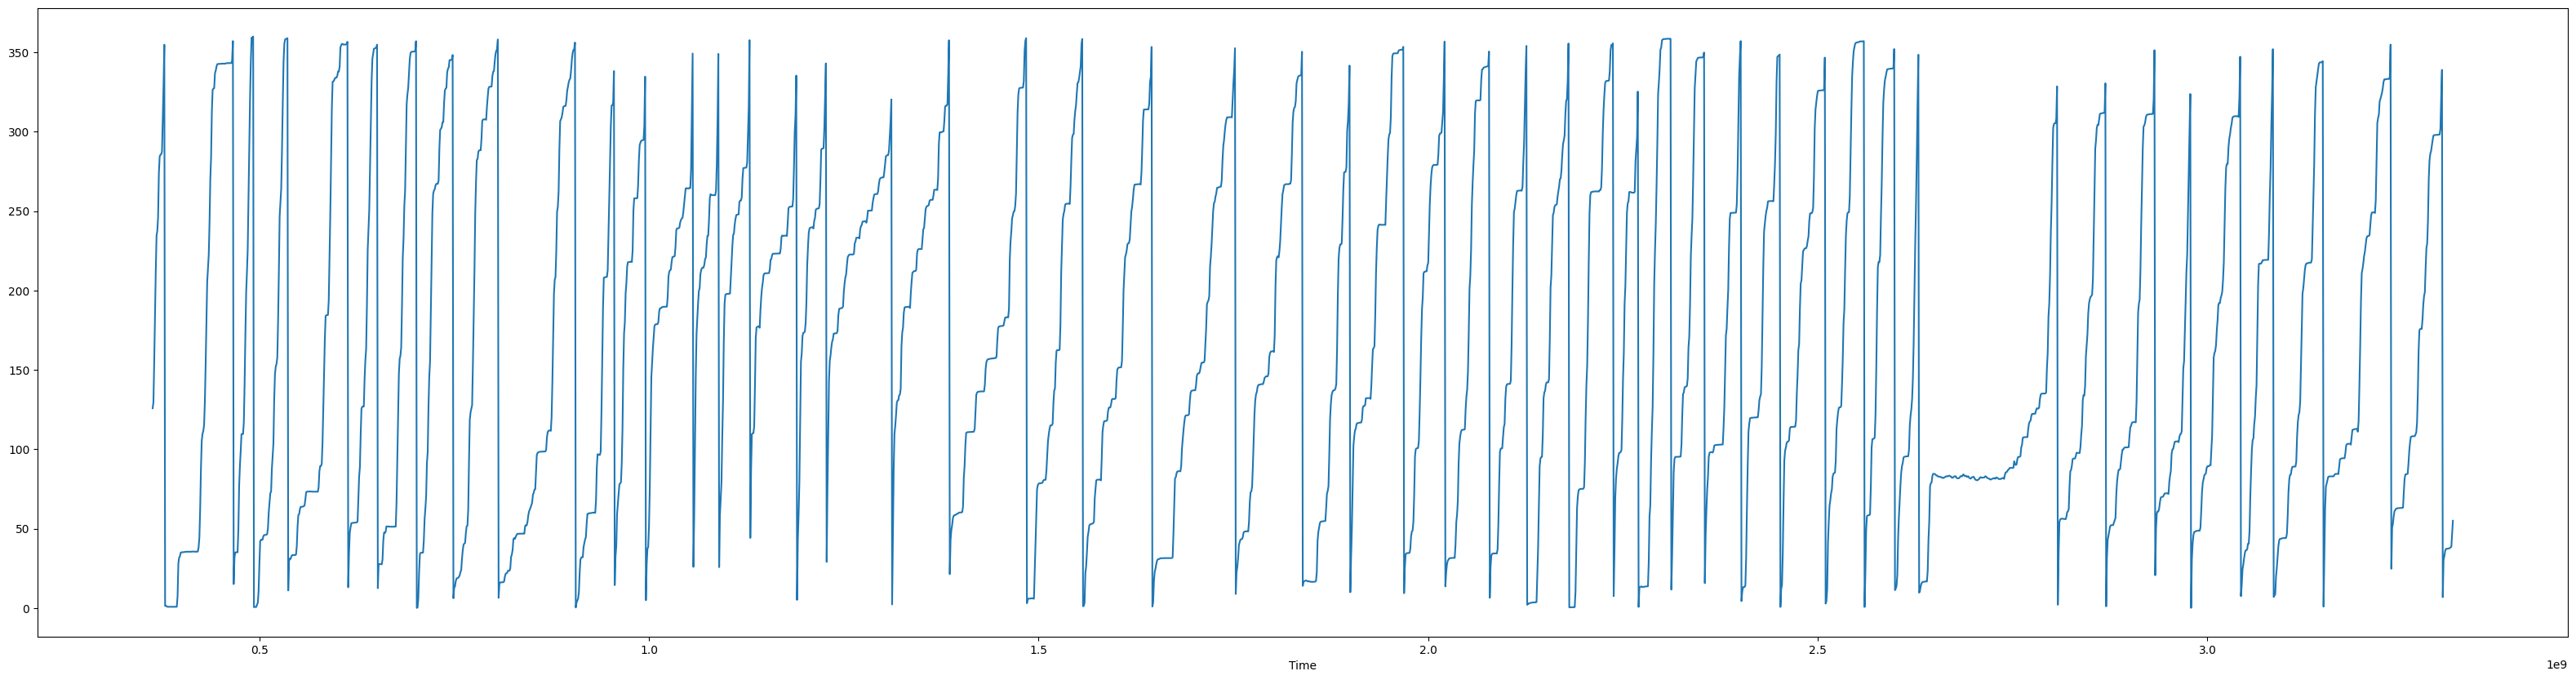

In [82]:
plt.subplots(figsize=(40, 10))
plt.plot(regular_times[:-1] + 500000, mod360_encangles)
plt.xlabel("Time");

In [83]:
len(mod360_encangles) == len(place_cells)

True

## Plot cell firings and rat positions together

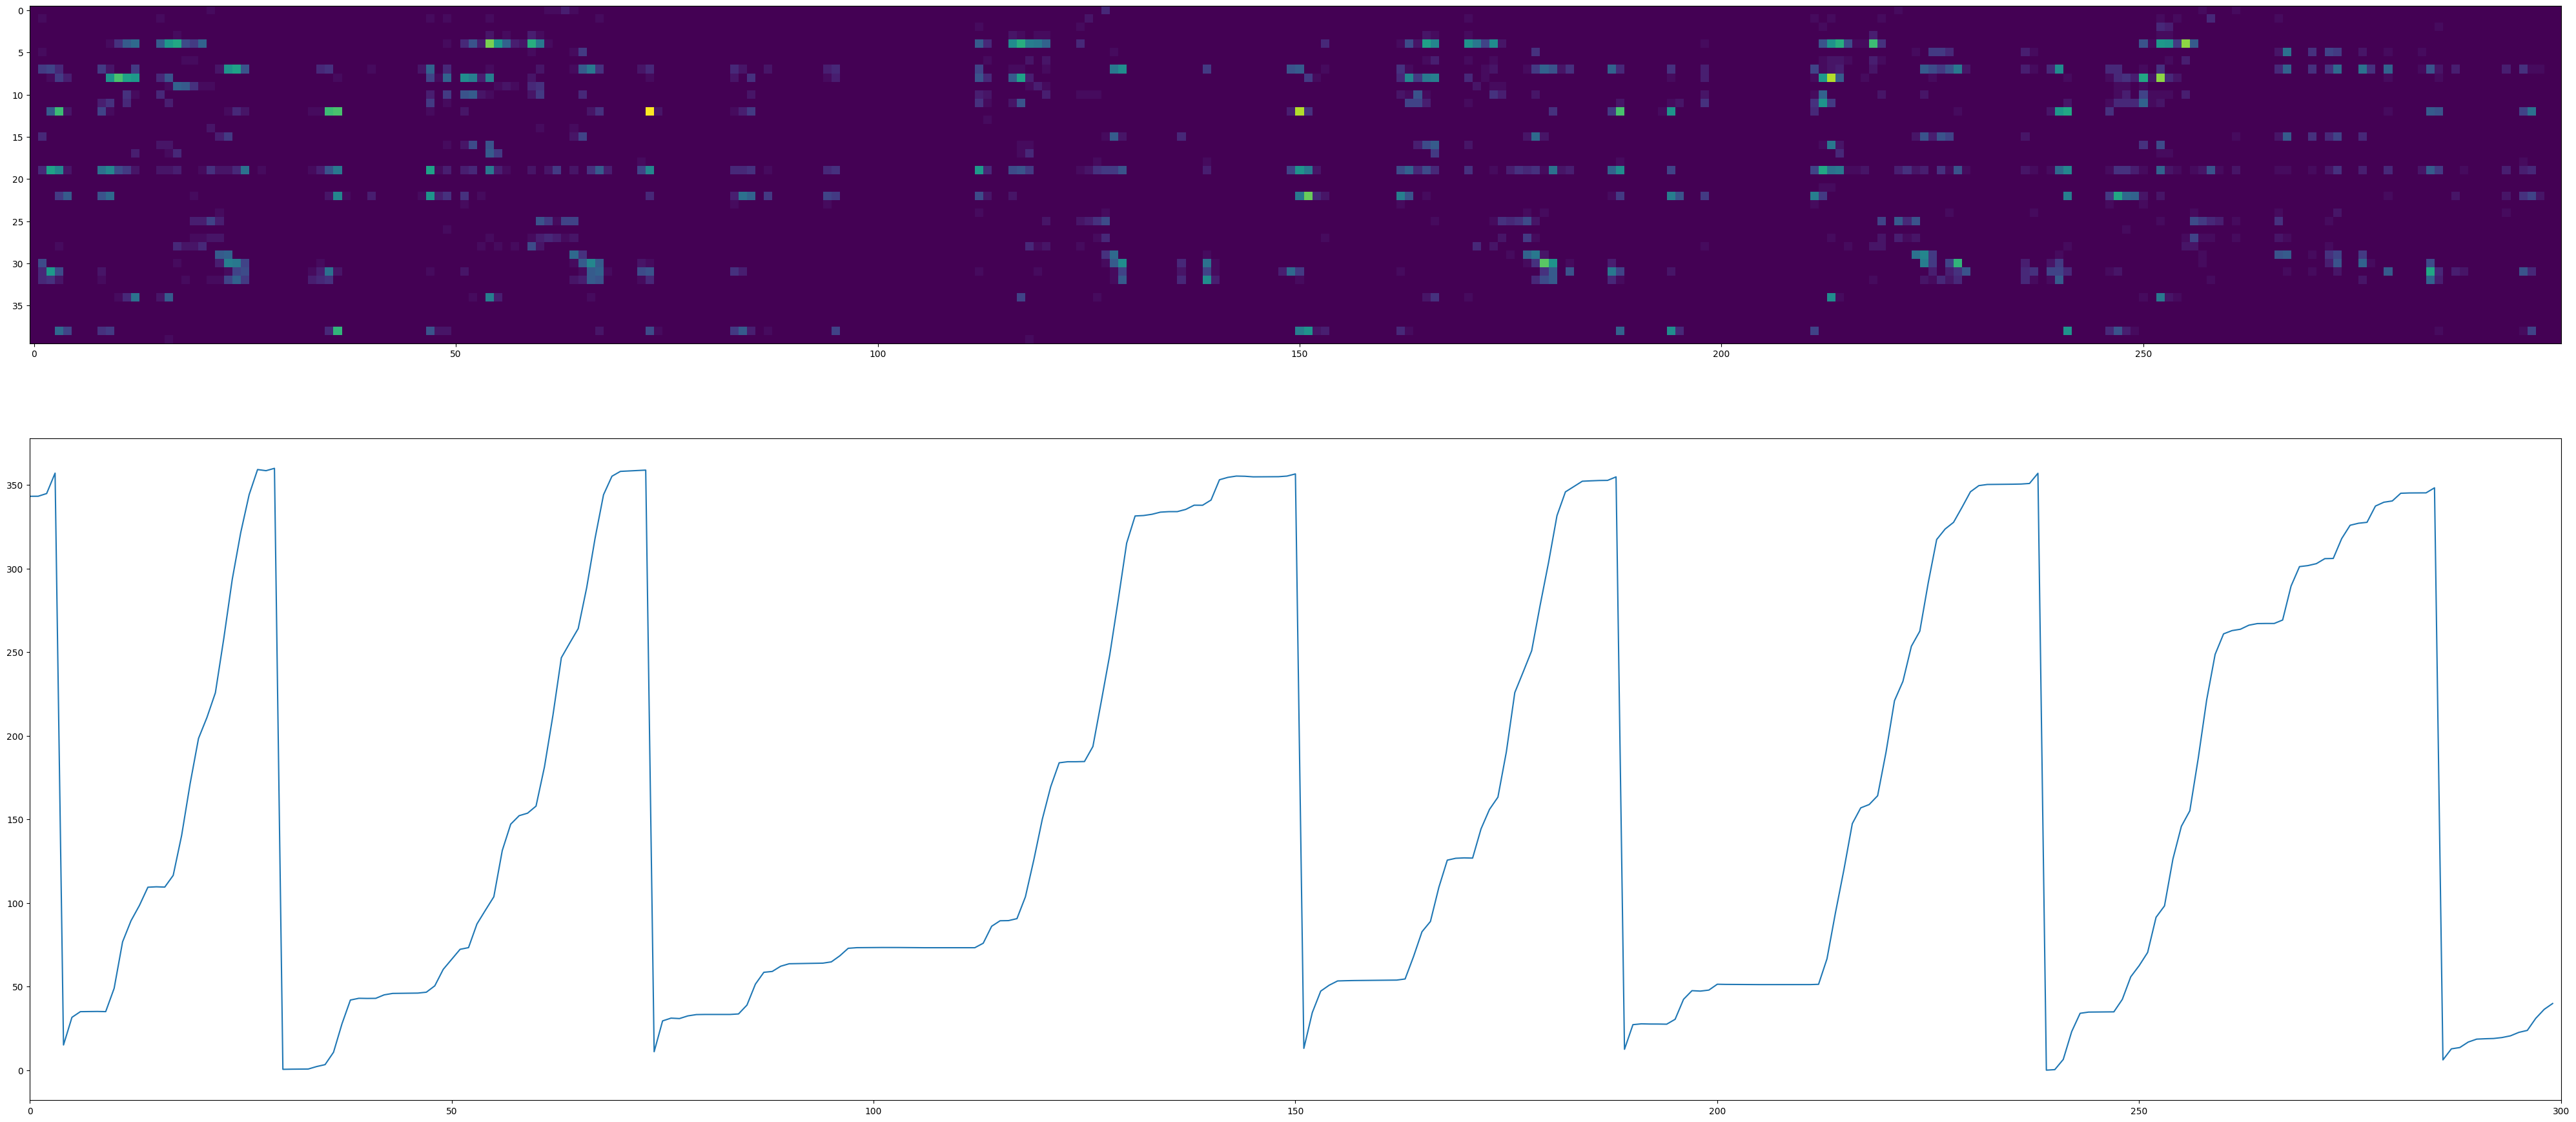

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(40, 20))

axes[0].imshow(
    place_cells[100:400,].T,
    cmap="viridis",
)
axes[1].plot(mod360_encangles[100:400])
axes[1].set_xlim(xmin=0, xmax=300)
plt.tight_layout()

# Explore all raw data

In [84]:
string_base = os.path.join(RAW_DIR, "expt*.mat")
print(string_base)
paths = sorted(glob.glob(string_base))

/Users/facosta/Desktop/code/neurometry/neurometry/data/raw/expt*.mat


In [91]:
path = paths[0]

In [95]:
expt_to_ncells_dict = {}
for path in paths:
    expt = utils.loadmat(path)
    basename = os.path.basename(path).split(".")[0]
    try:
        ncells = len(expt["x"]["clust"])
    except KeyError:
        print(f"!! Skipping {basename}")
        continue
    print(f"{basename}: {ncells} neurons.")
    expt_to_ncells_dict[basename] = ncells

expt10: 15 neurons.
expt10_hd: 30 neurons.
expt11: 11 neurons.
expt11_hd: 25 neurons.
expt12: 11 neurons.
expt12_hd: 27 neurons.
expt13: 11 neurons.
expt13_hd: 27 neurons.
expt14: 13 neurons.
expt14_hd: 38 neurons.
expt15: 11 neurons.
expt15_hd: 32 neurons.
expt16: 11 neurons.
expt16_hd: 26 neurons.
expt17: 11 neurons.
expt17_hd: 38 neurons.
expt18_hd: 36 neurons.
expt19_hd: 30 neurons.
expt2: 11 neurons.
expt20_hd: 29 neurons.
expt21_hd: 34 neurons.
expt23_hd: 19 neurons.
expt26_hd: 21 neurons.
expt27_hd: 18 neurons.
expt28_hd: 21 neurons.
expt29_hd: 21 neurons.
expt30_hd: 21 neurons.
expt31_hd: 24 neurons.
expt32_hd: 25 neurons.
expt33_hd: 16 neurons.
expt34: 40 neurons.
expt34_hd: 19 neurons.
expt35_hd: 17 neurons.
expt36_hd: 19 neurons.
expt37_hd: 20 neurons.
expt38_hd: 46 neurons.
expt39: 13 neurons.
expt39_hd: 48 neurons.
expt3_hd: 16 neurons.
expt4: 15 neurons.
expt40_hd: 50 neurons.
expt41: 12 neurons.
expt41_hd: 45 neurons.
expt42_hd: 44 neurons.
expt43: 12 neurons.
expt43_hd:

In [96]:
expt_to_ncells = pd.DataFrame.from_dict(
    expt_to_ncells_dict, orient="index", columns=["ncells"]
)
path = os.path.join(os.getcwd(), "data/expt_to_ncells.csv")
print(f"Saving the number of cells per experiments to: {path}.")
expt_to_ncells.to_csv(path)

Saving the number of cells per experiments to: /Users/facosta/Desktop/code/neurometry/neurometry/data/expt_to_ncells.csv.


In [97]:
sorted_expt_to_ncells = expt_to_ncells.sort_values(by="ncells", ascending=False)

In [98]:
sorted_expt_to_ncells[:10]

,ncells
expt45_hd,67
expt49_hd,58
expt44_hd,58
expt53_hd,57
expt47_hd,56
expt43_hd,55
expt48_hd,52
expt52_hd,51
expt40_hd,50
expt46_hd,50
